<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/unsupervised_learning/kmeans%7B50%20Days_pct_chg_nifty%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed -q


In [2]:
!pip install yfinance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
sc=StandardScaler()

In [5]:
import yfinance as yf
df =yf.download('^nsei','2012-01-01')
X = np.array((df['Close'].pct_change(104)).dropna()) #  -df['Close'].rolling(window=200).mean()).dropna()
X=sc.fit_transform(X.reshape(-1,1))
from sklearn.cluster import KMeans 
from kneed import DataGenerator, KneeLocator

[*********************100%***********************]  1 of 1 completed


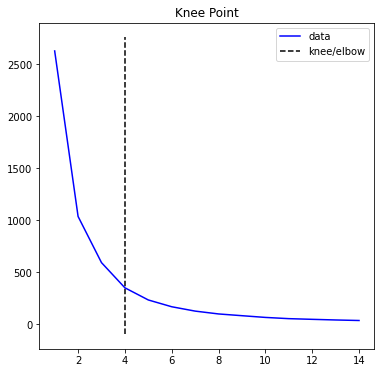

In [6]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
kn = KneeLocator(K, sum_of_squared_distances,S=1.0, curve="convex", direction="decreasing")
kn.plot_knee()
#plt.plot(sum_of_squared_distances)

In [7]:
kn.knee

4

In [8]:
kmeans = KMeans(n_clusters= kn.knee).fit(X.reshape(-1,1))
c = kmeans.predict(X.reshape(-1,1))

minmax = []
for i in range(kn.knee):
    minmax.append([-np.inf,np.inf])
for i in range(len(X)):
    cluster = c[i]
    if X[i] > minmax[cluster][0]:
        minmax[cluster][0] = X[i]
    if X[i] < minmax[cluster][1]:
        minmax[cluster][1] = X[i]

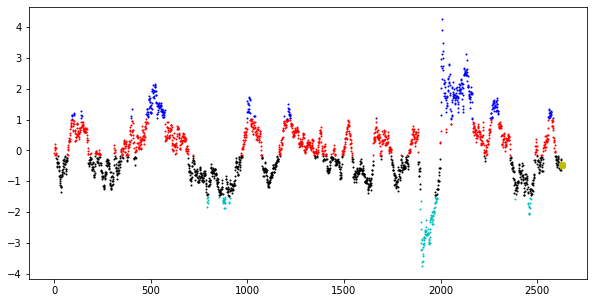

In [9]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
for i in range(len(X[:])):
    numbers=[1,2,3,4]
    colors = ['b','k','r','c']
    #3---> red,2----> black,4--->cyan,1--->blue
    c = kmeans.predict(X[i].reshape(-1,1))[0]
    
    color = colors[c]
    plt.scatter(i,X[i],c = color,cmap=matplotlib.colors.ListedColormap(sorted(numbers)),s = 1)
    plt.scatter(len(X)-1,X[len(X)-1],c='y')

In [10]:
df['cluster']=np.nan
df=df[-len(X):]
print(df.shape)

(2628, 7)


In [11]:
for i in range(len(X[:])):
    colors = [1,2,3,4]
    c = kmeans.predict(X[i].reshape(-1,1))[0]
    
    color = colors[c]
    df['cluster'][i]=color
    #plt.scatter(i,X[i],c = color,s = 1)
    #plt.scatter(len(X)-1,X[len(X)-1],c='y')

In [12]:
df.to_csv('data.csv')

In [13]:
sc.inverse_transform(X[[-1]])

array([[0.00712538]])

In [14]:
#df['cluster'].value_counts()

In [15]:
df['percentage_change']=df['Close'].pct_change(104)

# Top
##count    332.000000

##mean       0.236613

##std        0.053404

##min        0.165785

##25%        0.196565

##50%        0.228774

##75%        0.262859

##max        0.506711

#next to top
##count    1049.000000
##mean        0.095013
##std         0.032521
##min         0.037438
##25%         0.068647
##50%         0.094532
##75%         0.120761
##max         0.164591

#next to bottom
##count    950.000000
##mean      -0.021073
##std        0.034550
##min       -0.100134
##25%       -0.046875
##50%       -0.018104
##75%        0.007315
##max        0.037047

#bottom
##count    120.000000
##mean      -0.182758
##std        0.061700
##min       -0.343284
##25%       -0.232899
##50%       -0.171428
##75%       -0.123887
##max       -0.105458

In [16]:
df.loc[df['cluster'] ==1]['percentage_change'].describe() #top 

count    354.000000
mean       0.232923
std        0.053735
min        0.163694
25%        0.190752
50%        0.221648
75%        0.260914
max        0.506711
Name: percentage_change, dtype: float64

In [17]:
df.loc[df['cluster'] ==4]['percentage_change'].describe() #next to top

count    120.000000
mean      -0.182758
std        0.061700
min       -0.343284
25%       -0.232899
50%       -0.171428
75%       -0.123887
max       -0.105458
Name: percentage_change, dtype: float64

In [18]:
df.loc[df['cluster'] ==2]['percentage_change'].describe() #next to bottom

count    989.000000
mean      -0.019579
std        0.034801
min       -0.100134
25%       -0.045439
50%       -0.016262
75%        0.008603
max        0.038159
Name: percentage_change, dtype: float64

In [19]:
df.loc[df['cluster'] ==3]['percentage_change'].describe() #red (bottom)

count    1061.000000
mean        0.095368
std         0.032240
min         0.038483
25%         0.069169
50%         0.094757
75%         0.120930
max         0.162873
Name: percentage_change, dtype: float64

In [20]:
df_new=df[-700:].copy()
X_new=X[-700:]

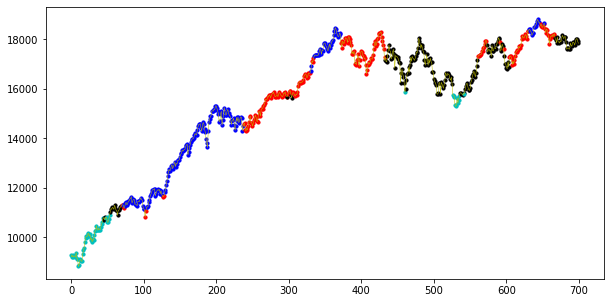

In [21]:
plt.figure(figsize=(10,5))
for i in range(len(df_new)):
    numbers=[1,2,3,4]
    colors = ['b','k','r','c']
    c = kmeans.predict(X_new[i].reshape(-1,1))[0]
    color = colors[c]
    
    plt.scatter(i,df_new['Close'].iloc[i],c = color,cmap=matplotlib.colors.ListedColormap(numbers),s =10)
df_new['Close'].reset_index(drop=True).plot(color='y',lw=0.5); 
plt.savefig('cluster_image.png')

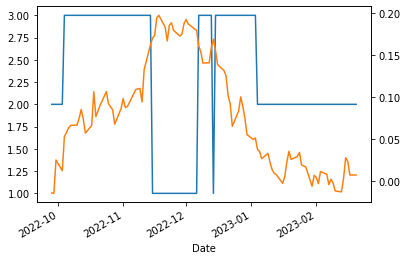

In [22]:
df_new[['cluster','percentage_change']][-100:].plot(secondary_y=['percentage_change'],legend=False);

In [23]:
df[['cluster','percentage_change']].value_counts()

cluster  percentage_change
1.0       0.163694            1
3.0       0.078236            1
          0.077483            1
          0.077741            1
          0.077765            1
                             ..
2.0      -0.016806            1
         -0.016756            1
         -0.016697            1
         -0.016606            1
4.0      -0.105458            1
Length: 2524, dtype: int64

In [24]:
df_new.tail(2)

,Open,High,Low,Close,Adj Close,Volume,cluster,percentage_change
Date,,,,,,,,
2023-02-17,17974.849609,18034.250000,17884.599609,17944.199219,17944.199219,208100,2.0,0.007182
2023-02-20,17965.550781,18004.349609,17818.400391,17844.599609,17844.599609,174600,2.0,0.007125


In [25]:
0.037438<0.093400<0.164591

True

In [26]:
0.164591

0.164591